# 5. Multiplicative Seasonality 乘法季节性
默认情况下，Prophet能够满足附加的季节性，这意味着季节性的影响是加到趋势中得到了最后的预报（yhat）。航空旅客数量的时间序列是一个附加的季节性不起作用的例子：

In [2]:
from fbprophet import Prophet
import pandas as pd

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


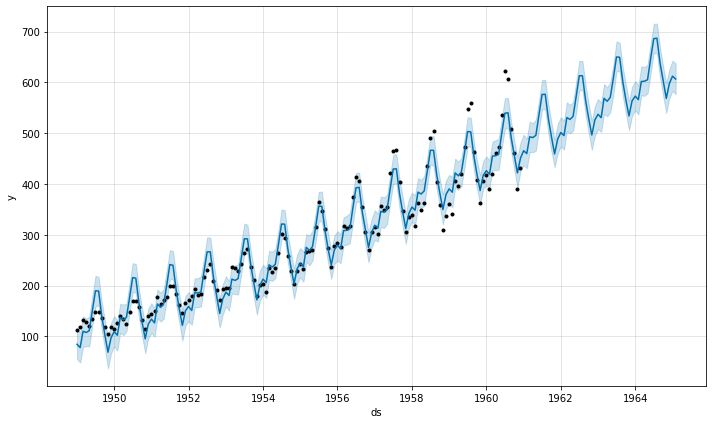

In [5]:
df = pd.read_csv('./examples/example_air_passengers.csv')
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
pd.plotting.register_matplotlib_converters()
fig = m.plot(forecast)

这个时间序列有一个明显的年度周期，但预测中的季节性在时间序列开始时太大，在结束时又太小。在这个时间序列中，季节性并不是Prophet所假定的是一个恒定的加性因子，而是随着趋势在增长。这就是乘法季节性（multiplicative seasonality）。 

Prophet可以通过设置**seasonality_mode='multiplicative'**来建模乘法季节性:

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


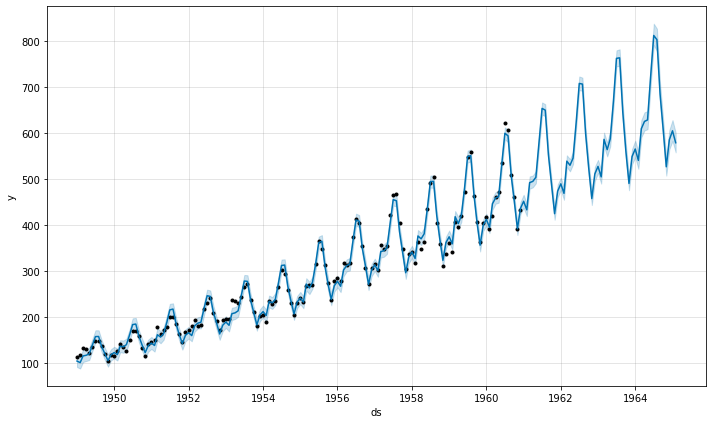

In [6]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

看一下乘法的成分图:

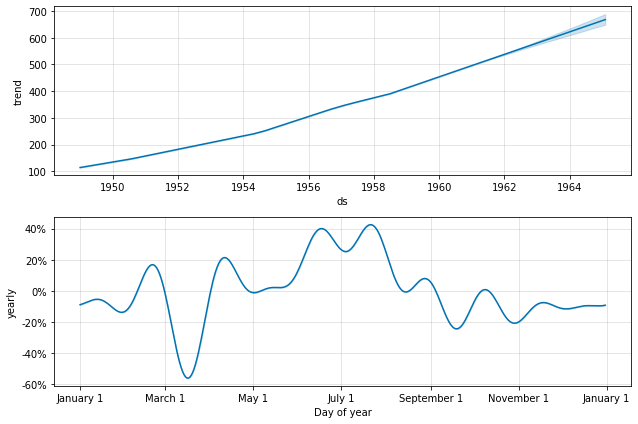

In [7]:
fig1 = m.plot_components(forecast)

In [11]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,1949-01-01,114.021617,90.714021,116.102695,114.021617,114.021617,-0.089624,-0.089624,-0.089624,-0.089624,-0.089624,-0.089624,0.0,0.0,0.0,103.802521
1,1949-02-01,115.754484,87.448980,113.475786,115.754484,115.754484,-0.133337,-0.133337,-0.133337,-0.133337,-0.133337,-0.133337,0.0,0.0,0.0,100.320165
2,1949-03-01,117.319653,101.657173,128.184881,117.319653,117.319653,-0.021198,-0.021198,-0.021198,-0.021198,-0.021198,-0.021198,0.0,0.0,0.0,114.832665
3,1949-04-01,119.052520,103.913509,128.823265,119.052520,119.052520,-0.022727,-0.022727,-0.022727,-0.022727,-0.022727,-0.022727,0.0,0.0,0.0,116.346850
4,1949-05-01,120.729488,105.973775,132.884553,120.729488,120.729488,-0.011912,-0.011912,-0.011912,-0.011912,-0.011912,-0.011912,0.0,0.0,0.0,119.291311


与第一部分对成分图分析类似，我们这里对乘法模型的成分图进行一个分析：

①图1是根据trend画出来的，图2是根据yearly画出来的。

②因为是乘法模型，有：forecast['multiplicative_terms'] = forecast['yearly']；因此：**forecast['yhat']  = forecast['trend'] * (1+forecast['multiplicative_terms'])。**

使用seasonality_mode='multiplicative'，节假日也将被建模为乘法效果。

③因为是乘法模型，'additive_terms', 'additive_terms_lower', 'additive_terms_upper'这3列为0。

 

默认情况下，任何添加的季节性或额外的回归量都可以使用**seasality_mode**设置为加法或者是乘法。但假如在添加季节性或回归量时，可以通过指定**mode=' addiative '或mode=' ative'**作为参数来覆盖之前的设定。 

例如，这个模块将内置的季节性设置为乘法，但使用一个附加的季度季节性来覆盖原本的乘法，**这时候季度季节性就是加法了。**

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


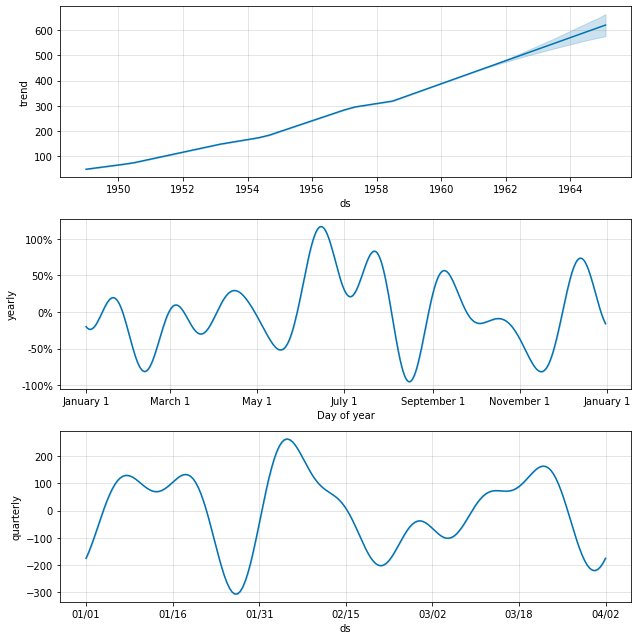

In [22]:
df = pd.read_csv('examples/example_air_passengers.csv')
m = Prophet(seasonality_mode='multiplicative')

m.add_seasonality('quarterly', period=91.25, fourier_order=8, mode='additive')
m.fit(df)
forecast = m.predict(future)
fig2 = m.plot_components(forecast)

额外的加法的季度季节性将出现在成分图的单独的面板上

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


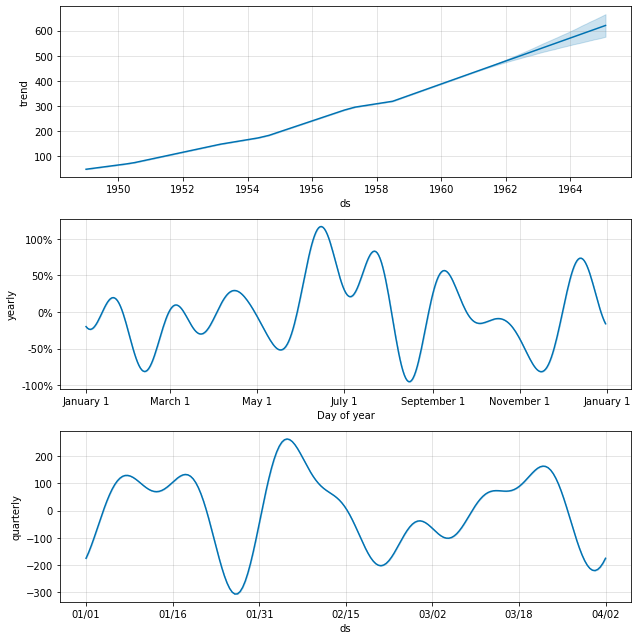

In [31]:
df = pd.read_csv('examples/example_air_passengers.csv')
m = Prophet(seasonality_mode='multiplicative')

m.add_seasonality('quarterly', period=91.25, fourier_order=8, mode='additive')

m.fit(df)
forecast = m.predict(future)
fig3 = m.plot_components(forecast)

下面是官网给的例子，其中

m.add_regressor('regressor', mode='additive')

画图时一直出错

In [30]:
m = Prophet(seasonality_mode='multiplicative')
m.add_seasonality('quarterly', period=91.25, fourier_order=8, mode='additive')
m.add_regressor('regressor', mode='additive')